## Predicting Stock Market Crashes -- Comparison of Results
- Linear Regression / Logistic Regression / SVM (linear kernel) / SVM (RBF kernel) / Decision Trees / RNN LSTM
- 16 features for all models except RNN / 2 sequences of length 14 for RNN LSTMs
- Predictions for crash withinin 1 month / 3 months / 6 months

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

In [2]:
# 1 month prediction results:
d = {}
d['Linear Regression'] = [0.02, 0.05, 0.14, 0.4, 0.95, 0.29, 0.14,\
                          0.36, 0.95, 0.27, 0.02, 0.03, 0.16, 0.35, 0.96, 0.28]
d['Logistic Regression'] = [0.02, 0.07, 0.11, 0.47, 0.93, 0.28, 0.11,\
                            0.42, 0.93, 0.26, 0.02, 0.07, 0.12, 0.45, 0.94, 0.29]
d['SVC (linear)'] = [0.02, 0.06, 0.12, 0.48, 0.93, 0.30, 0.12, 0.44,\
                     0.93, 0.28, 0.02, 0.06, 0.12, 0.44, 0.94, 0.29]
d['SVC (RBF)'] = [0.02, 0.08, 0.12, 0.60, 0.92, 0.33, 0.10, 0.49, 0.91,\
                  0.28, 0.02, 0.07, 0.09, 0.39, 0.93, 0.24]
d['Decision Tree'] = [0.02, 0.01, 0.99, 0.90, 1.00, 0.92, 0.10, 0.10,\
                      0.97, 0.10, 0.02, 0.01, 0.11, 0.10, 0.97, 0.10]
d['RNN LSTM'] = [0.02, 0.04, 0.18, 0.44, 0.96, 0.34, 0.17, 0.37, 0.95,\
                 0.29, 0.02, 0.04, 0.10, 0.28, 0.95, 0.21] 
d['random'] = [0.02, 0.05, 0.02, 0.05, 0.94, 0.04, 0.02, 0.05, 0.94, 0.04,\
              0.02, 0.05, 0.02, 0.05, 0.94, 0.04]
results_1m = pd.DataFrame.from_dict(d, orient='index')
results_1m.columns = ['positive_actual', 'positive_pred', 'precision_tr', 'recall_tr',\
                      'accuracy_tr', 'score_tr', 'precision_val','recall_val', 'accuracy_val',\
                      'score_val', 'positive_act', 'positive_pred', 'precision_t', 'recall_t',\
                      'accuracy_t', 'score_t']

# 3 months prediction results:
d = {}
d['Linear Regression'] = [0.04, 0.17, 0.13, 0.5, 0.83, 0.31, 0.13, 0.5,\
                          0.83, 0.32, 0.04, 0.16, 0.15, 0.59, 0.84, 0.37]
d['Logistic Regression'] = [0.04, 0.16, 0.13, 0.47, 0.84, 0.31, 0.13, 0.46,\
                            0.84, 0.30, 0.04, 0.15, 0.15, 0.56, 0.85, 0.36]
d['SVC (linear)'] = [0.04, 0.14, 0.14, 0.48, 0.86, 0.33, 0.15, 0.46, 0.86,\
                     0.32, 0.04, 0.14, 0.16, 0.52, 0.87, 0.36]
d['SVC (RBF)'] = [0.04, 0.14, 0.17, 0.57, 0.86, 0.39, 0.15, 0.45, 0.86, 0.31,\
                  0.04, 0.14, 0.16, 0.52, 0.87, 0.36]
d['Decision Tree'] = [0.04, 0.04, 1.00, 0.99, 1.00, 0.99, 0.12, 0.12, 0.92,\
                      0.11, 0.04, 0.04, 0.07, 0.07, 0.92, 0.07]
d['RNN LSTM'] = [0.04, 0.15, 0.14, 0.5, 0.84, 0.33, 0.15, 0.47, 0.84, 0.32,\
                 0.04, 0.13, 0.15, 0.48, 0.87, 0.33] 
d['random'] = [0.04, 0.18, 0.04, 0.18, 0.19, 0.11, 0.04, 0.18, 0.19, 0.11,\
              0.04, 0.18, 0.04, 0.18, 0.19, 0.11]
results_3m = pd.DataFrame.from_dict(d, orient='index')
results_3m.columns = ['positive_actual', 'positive_pred', 'precision_tr', 'recall_tr',\
                      'accuracy_tr', 'score_tr', 'precision_val','recall_val', 'accuracy_val',\
                      'score_val', 'positive_act', 'positive_pred', 'precision_t', 'recall_t',\
                      'accuracy_t', 'score_t']

# 6 months prediction results:
d = {}
d['Linear Regression'] = [0.08, 0.37, 0.14, 0.61, 0.65, 0.36, 0.14, 0.63,\
                          0.66, 0.37, 0.07, 0.36, 0.14, 0.68, 0.67, 0.38]
d['Logistic Regression'] = [0.08, 0.31, 0.15, 0.56, 0.7, 0.36, 0.15, 0.58,\
                            0.71, 0.36, 0.08, 0.31, 0.16, 0.66, 0.72, 0.40]
d['SVC (linear)'] = [0.08, 0.28, 0.15, 0.55, 0.73, 0.36, 0.16, 0.55, 0.73,\
                     0.36, 0.08, 0.28, 0.17, 0.6, 0.77, 0.40]
d['SVC (RBF)'] = [0.08, 0.32, 0.16, 0.67, 0.7, 0.42, 0.16, 0.62, 0.7, 0.38,\
                  0.08, 0.32, 0.15, 0.71, 0.69, 0.41]
d['Decision Tree'] = [0.08, 0.08, 1.00, 1.00, 1.00, 1.00, 0.15, 0.13, 0.87,\
                      0.13, 0.08, 0.08, 0.12, 0.12, 0.88, 0.12]
d['RNN LSTM'] = [0.08, 0.36, 0.15, 0.64, 0.66, 0.37, 0.14, 0.63, 0.66, 0.36,\
                 0.07, 0.35, 0.15, 0.71, 0.68, 0.40]
d['random'] = [0.08, 0.36, 0.08, 0.36, 0.61, 0.21, 0.08, 0.36, 0.61, 0.21,\
              0.08, 0.36, 0.08, 0.36, 0.61, 0.21]
results_6m = pd.DataFrame.from_dict(d, orient='index')
results_6m.columns = ['positive_actual', 'positive_pred', 'precision_tr', 'recall_tr',\
                      'accuracy_tr', 'score_tr', 'precision_val','recall_val', 'accuracy_val',\
                      'score_val', 'positive_act', 'positive_pred', 'precision_t', 'recall_t',\
                      'accuracy_t', 'score_t']

In [3]:
print('Training results 1 month prediciton:')
display(results_1m.iloc[:,:10])
print('Training results 3 month prediciton:')
display(results_3m.iloc[:,:10])
print('Training results 6 month prediciton:')
display(results_6m.iloc[:,:10])
print('Test results 1 month prediciton:')
display(results_1m.iloc[:,10:])
print('Test results 3 month prediciton:')
display(results_3m.iloc[:,10:])
print('Test results 6 month prediciton:')
display(results_6m.iloc[:,10:])

Training results 1 month prediciton:


,positive_actual,positive_pred,precision_tr,recall_tr,accuracy_tr,score_tr,precision_val,recall_val,accuracy_val,score_val
Linear Regression,0.02,0.05,0.14,0.40,0.95,0.29,0.14,0.36,0.95,0.27
Logistic Regression,0.02,0.07,0.11,0.47,0.93,0.28,0.11,0.42,0.93,0.26
SVC (linear),0.02,0.06,0.12,0.48,0.93,0.30,0.12,0.44,0.93,0.28
SVC (RBF),0.02,0.08,0.12,0.60,0.92,0.33,0.10,0.49,0.91,0.28
Decision Tree,0.02,0.01,0.99,0.90,1.00,0.92,0.10,0.10,0.97,0.10
RNN LSTM,0.02,0.04,0.18,0.44,0.96,0.34,0.17,0.37,0.95,0.29
random,0.02,0.05,0.02,0.05,0.94,0.04,0.02,0.05,0.94,0.04


Training results 3 month prediciton:


,positive_actual,positive_pred,precision_tr,recall_tr,accuracy_tr,score_tr,precision_val,recall_val,accuracy_val,score_val
Linear Regression,0.04,0.17,0.13,0.50,0.83,0.31,0.13,0.50,0.83,0.32
Logistic Regression,0.04,0.16,0.13,0.47,0.84,0.31,0.13,0.46,0.84,0.30
SVC (linear),0.04,0.14,0.14,0.48,0.86,0.33,0.15,0.46,0.86,0.32
SVC (RBF),0.04,0.14,0.17,0.57,0.86,0.39,0.15,0.45,0.86,0.31
Decision Tree,0.04,0.04,1.00,0.99,1.00,0.99,0.12,0.12,0.92,0.11
RNN LSTM,0.04,0.15,0.14,0.50,0.84,0.33,0.15,0.47,0.84,0.32
random,0.04,0.18,0.04,0.18,0.19,0.11,0.04,0.18,0.19,0.11


Training results 6 month prediciton:


,positive_actual,positive_pred,precision_tr,recall_tr,accuracy_tr,score_tr,precision_val,recall_val,accuracy_val,score_val
Linear Regression,0.08,0.37,0.14,0.61,0.65,0.36,0.14,0.63,0.66,0.37
Logistic Regression,0.08,0.31,0.15,0.56,0.70,0.36,0.15,0.58,0.71,0.36
SVC (linear),0.08,0.28,0.15,0.55,0.73,0.36,0.16,0.55,0.73,0.36
SVC (RBF),0.08,0.32,0.16,0.67,0.70,0.42,0.16,0.62,0.70,0.38
Decision Tree,0.08,0.08,1.00,1.00,1.00,1.00,0.15,0.13,0.87,0.13
RNN LSTM,0.08,0.36,0.15,0.64,0.66,0.37,0.14,0.63,0.66,0.36
random,0.08,0.36,0.08,0.36,0.61,0.21,0.08,0.36,0.61,0.21


Test results 1 month prediciton:


,positive_act,positive_pred,precision_t,recall_t,accuracy_t,score_t
Linear Regression,0.02,0.03,0.16,0.35,0.96,0.28
Logistic Regression,0.02,0.07,0.12,0.45,0.94,0.29
SVC (linear),0.02,0.06,0.12,0.44,0.94,0.29
SVC (RBF),0.02,0.07,0.09,0.39,0.93,0.24
Decision Tree,0.02,0.01,0.11,0.10,0.97,0.10
RNN LSTM,0.02,0.04,0.10,0.28,0.95,0.21
random,0.02,0.05,0.02,0.05,0.94,0.04


Test results 3 month prediciton:


,positive_act,positive_pred,precision_t,recall_t,accuracy_t,score_t
Linear Regression,0.04,0.16,0.15,0.59,0.84,0.37
Logistic Regression,0.04,0.15,0.15,0.56,0.85,0.36
SVC (linear),0.04,0.14,0.16,0.52,0.87,0.36
SVC (RBF),0.04,0.14,0.16,0.52,0.87,0.36
Decision Tree,0.04,0.04,0.07,0.07,0.92,0.07
RNN LSTM,0.04,0.13,0.15,0.48,0.87,0.33
random,0.04,0.18,0.04,0.18,0.19,0.11


Test results 6 month prediciton:


,positive_act,positive_pred,precision_t,recall_t,accuracy_t,score_t
Linear Regression,0.07,0.36,0.14,0.68,0.67,0.38
Logistic Regression,0.08,0.31,0.16,0.66,0.72,0.40
SVC (linear),0.08,0.28,0.17,0.60,0.77,0.40
SVC (RBF),0.08,0.32,0.15,0.71,0.69,0.41
Decision Tree,0.08,0.08,0.12,0.12,0.88,0.12
RNN LSTM,0.07,0.35,0.15,0.71,0.68,0.40
random,0.08,0.36,0.08,0.36,0.61,0.21


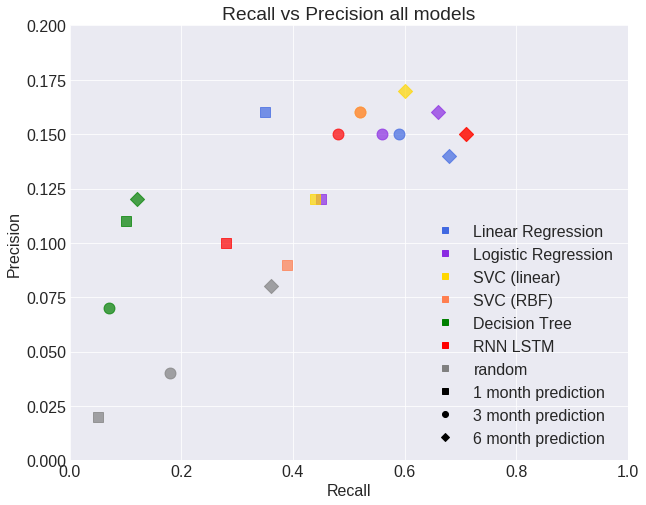

In [5]:
# ---------- Plot results recall vs precision ---------- #
colors = ['royalblue', 'blueviolet', 'gold', 'coral', 'green', 'red', 'gray']
markers = ['s', 'o', 'D']
f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
handles = [f('s', colors[i]) for i in range(7)]
handles += [f(markers[i], 'k') for i in range(3)]
labels = list(results_6m.index) + ['1 month prediction', '3 month prediction', '6 month prediction']
rcParams.update({'font.size': 16})
rcParams['figure.figsize'] = 10, 8
plt.style.use('seaborn-darkgrid')
x = list(results_1m['recall_t'])
y = list(results_1m['precision_t'])
for x_, y_, c_ in zip(x, y, colors):
    plt.scatter(x_, y_, marker='s', c=c_, linewidths=1, s=110, alpha=0.7)
x = list(results_3m['recall_t'])
y = list(results_3m['precision_t'])
for x_, y_, c_ in zip(x, y, colors):
    plt.scatter(x_, y_, marker='o', c=c_, linewidths=1, s=120, alpha=0.7)
x = list(results_6m['recall_t'])
y = list(results_6m['precision_t'])
for x_, y_, c_ in zip(x, y, colors):
    plt.scatter(x_, y_, marker='D', c=c_, linewidths=1, s=100, alpha=0.7)
plt.legend(handles, labels, loc=4, framealpha=1)
plt.title('Recall vs Precision all models')
plt.xlim(xmin=0, xmax=1)
plt.ylim(ymin=0, ymax=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

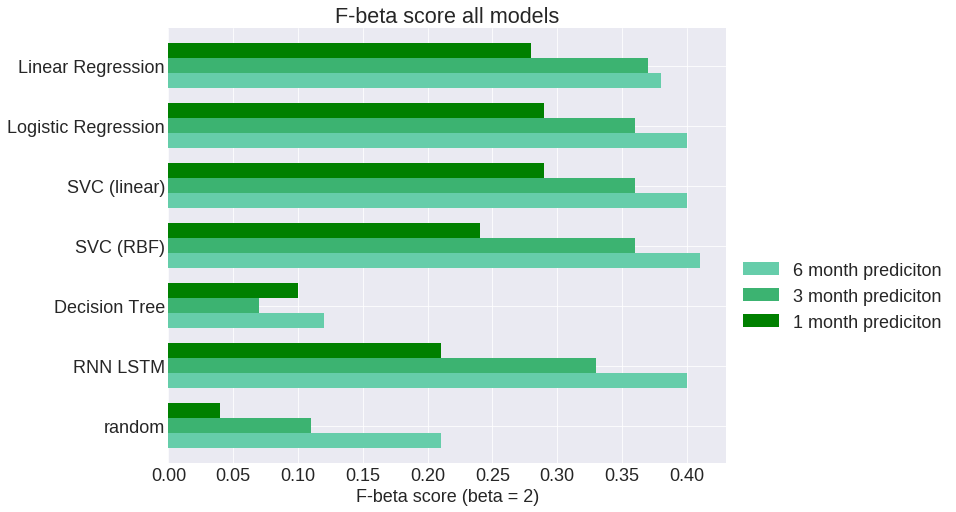

In [6]:
# ---------- Plot results f-beta score ---------- #
rcParams['figure.figsize'] = 10, 8
rcParams.update({'font.size': 18})
df = pd.concat([results_6m['score_t'], results_3m['score_t'], results_1m['score_t']], axis=1)
df.columns = ['6 month prediciton', '3 month prediciton', '1 month prediciton']
df = df.iloc[::-1]
df.plot(kind='barh', stacked=False, width=0.75, color=['mediumaquamarine','mediumseagreen','green'])
plt.title('F-beta score all models')
plt.xlabel('F-beta score (beta = 2)')
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.show()